# Final Project. Data 620. Fall 2019. By Betsy Roslen and Mikhail Groysman. 12/12/2019

## Project Overview


### Final Project 

Your project should incorporate one or both of the two main themes of this course: network analysis and text processing. You need to show all of your work in a coherent workflow, and in a reproducible format, such as an IPython Notebook or an R Markdown document. If you are building a model or models, explain how you evaluate the “goodness” of the chosen model and parameters. 

### Final Project Presentation 

We’ll schedule a short presentation for each team, either in our last scheduled meet-up or in additional office hours to be scheduled during the last week of classes.

### Policy on Collaboration 

You may work in a team of up to three people. Each project team member is responsible for understanding and being able to explain all of the submitted project code. Remember that you can take work that you find elsewhere as a base to build on, but you need to acknowledge the source, so that I base your grade on what you contributed, not on what you started with!

## Recipe ingredients data

We chose a dataset that we found on the [Data Is Plural — Structured Archive](https://docs.google.com/spreadsheets/d/1wZhPLMCHKJvwOkP4juclhjFgqIY8fQFMemwKL2c64vk/edit#gid=0) that conists of 56,498 recipes from various cuisines that were scraped from 3 popular recipe websites.

__Description from Data Is Plural__

> For their 2011 paper, “Flavor network and the principles of food pairing,” four scientists analyzed 56,498 recipes downloaded from three websites — allrecipes.com, epicurious.com, and menupan.com. To support their findings, the authors published two datasets. One names the cuisine and ingredients for each recipe. The other dataset counts how often any two ingredients appeared in the same recipe. (Parmesan cheese and beef appeared together 93 times; starfruit and Algerian geranium oil just once.) Related: “food2vec – Augmented cooking with machine intelligence,” published last month. [h/t Rob Barry](http://rob-barry.com/).

The __original research article__, Flavor network and the principles of food pairing, can be found here: __[Flavor network and the principles of food pairing](http://www.nature.com/articles/srep00196)__  
The __additional related article__ cited above can be found here: __[food2vec – Augmented cooking with machine intelligence](https://jaan.io/food2vec-augmented-cooking-machine-intelligence)__  

__The data__ is easily downloaded in CSV format from the __[Electronic supplementary material](https://www.nature.com/articles/srep00196#Sec8)__ section of the Flavor network and the principles of food pairing research paper webpage.

__The data downloads consist of the following two files:__

- srep00196-s2.csv - counts of how many flavour compounds any two ingredients share
- srep00196-s3.csv - one record per recipe with the ingredients listed in columns

__Structure of the srep00196-s2 dataset:__

- The paired ingredients are listed one each in the first two columns and the count of shared flavour compounds they share. We may or may not use this dataset.

__Structure of the srep00196-s3 dataset:__

- The type of cuisine is listed in the first column with the remaining columns containing one ingredient per column. 
    - The cuisine categories include:
        - African
        - EastAsian
        - EasternEuropean
        - LatinAmerican
        - MiddleEastern
        - NorthAmerican
        - NorthernEuropean
        - SouthAsian
        - SoutheastAsian
        - SouthernEuropean
        - WesternEuropean

Significant data manipulation will be necessary to analyze this dataset both as a text and as a network.  

## Step 1. Loading Libraries


In [2]:
import pandas as pd
import numpy as np
import math    
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')

<Figure size 1600x480 with 0 Axes>

## Step 2. Loading Data


In [3]:
fname ='srep00196-s2A.csv'

fname1 ='srep00196-s3A.csv'

#Function to read data from csv file
def read_df(fname):
    try:
        fo = open(fname, "r+")    
    except IOError:
        print("We were not able to open the file",fname,". Check the file path. Sorry!")   
    df=pd.read_csv(fname,header=None)
        
    return df

ING=read_df(fname)
COU=read_df(fname1)
ING.columns = ['Ing1', 'Ing2','SharedComp']
COU.columns = ['Cuisine', 'I1','I2','I3','I4','I5','I6','I7','I8','I9','I10','I11','I12','I13','I14','I15','I16','I17','I18','I19','I20',
              'I21','I22','I23','I24','I25','I26','I27','I28','I29','I30','I31','I32']

C:\Users\m_gro\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3248: DtypeWarning: Columns (25,26,27,28,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


### Step 3. Exploratory Data Analysis

In [4]:
print(ING.shape)

(221777, 3)


In [5]:
print(COU.shape)

(56498, 33)


In [6]:
def EDA_DF(df):
    
    pd.options.display.float_format = '{:,.2f}'.format
    #EDA_DF 1. Getting file domensions.
    print(df.shape)

    
    #EDA_DF 2. Looking at columns
    print(df.columns.values)

    
    #EDA_DF 3. We get column description.
    print(df.describe())

    #EDA_DF 4. Let's check variables types.
    print(df.info())

    #EDA_DF 5. Let's see how many vaues are missing
    print(df.isnull().sum())

    #EDA_DF 6. Let's see first raws of the dataset.
    print(df.head())
 

EDA_DF(ING)

(221777, 3)
['Ing1' 'Ing2' 'SharedComp']
       SharedComp
count  221,777.00
mean         9.08
std         15.57
min          1.00
25%          1.00
50%          2.00
75%          9.00
max        227.00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221777 entries, 0 to 221776
Data columns (total 3 columns):
Ing1          221777 non-null object
Ing2          221777 non-null object
SharedComp    221777 non-null int64
dtypes: int64(1), object(2)
memory usage: 5.1+ MB
None
Ing1          0
Ing2          0
SharedComp    0
dtype: int64
                Ing1           Ing2  SharedComp
0  black_sesame_seed      rose_wine           3
1             fennel     wild_berry           5
2       comte_cheese          grape          57
3               nira       raw_beef           1
4      corn_mint_oil  parsnip_fruit           2


Number of shared compounds varies from 1 to 227, with average of 9. Most compounds share just one ingredient.

In [7]:
EDA_DF(COU)

(56498, 33)
['Cuisine' 'I1' 'I2' 'I3' 'I4' 'I5' 'I6' 'I7' 'I8' 'I9' 'I10' 'I11' 'I12'
 'I13' 'I14' 'I15' 'I16' 'I17' 'I18' 'I19' 'I20' 'I21' 'I22' 'I23' 'I24'
 'I25' 'I26' 'I27' 'I28' 'I29' 'I30' 'I31' 'I32']
              Cuisine      I1     I2     I3     I4     I5     I6      I7  \
count           56498   56498  56144  55001  52681  48870  43429   37026   
unique             11     294    319    316    329    319    317     309   
top     NorthAmerican  butter  wheat  wheat  onion  onion    egg  garlic   
freq            41524   17761   7010   8399   5156   2984   2775    2715   

            I8      I9  ...       I23       I24          I25    I26    I27  \
count    30197   23539  ...        70        40           19     13      9   
unique     299     290  ...        37        27           15     11      7   
top     garlic  garlic  ...  turmeric  turmeric  bell_pepper  smoke  thyme   
freq      2727    2060  ...         8         5            3      2      2   

        I28     I29

Number of ingredients in recipies varies from 1 to 32.

#### 3.1 Flavour Compound Data

In [8]:
ING.sort_values(by='SharedComp', ascending=False).head()

,Ing1,Ing2,SharedComp
195042,bantu_beer,beer,227
154779,grilled_beef,roasted_beef,207
206063,fried_beef,grilled_beef,200
49623,beef,boiled_beef,199
103283,boiled_beef,fried_beef,199


2 types of beer share the most flavour compounds.

In [10]:
ING['test'] = ING.apply(lambda x: x['Ing1'] in x['Ing2'], axis=1)

ING[ING['test']==True].head()

,Ing1,Ing2,SharedComp,test
376,pork,pork_liver,7,True
377,pork,uncured_smoked_pork,115,True
1691,nut,roasted_macadamia_nut,8,True
1801,apple,pineapple,64,True
2128,cheese,cottage_cheese,127,True


Many ingredients have simular names and generally are simular ingredients, such as pork and pork liver and so on.

In [13]:
ING1=pd.melt(ING, id_vars=['SharedComp'], value_vars=['Ing1', 'Ing2'])

ING1.head()

,SharedComp,variable,value
0,3,Ing1,black_sesame_seed
1,5,Ing1,fennel
2,57,Ing1,comte_cheese
3,1,Ing1,nira
4,2,Ing1,corn_mint_oil


In [14]:
temp = ING1.value.value_counts()
temp.head()

black_tea            989
green_tea            966
roasted_green_tea    966
bantu_beer           951
fermented_tea        950
Name: value, dtype: int64

Black tea has the most occurances in the dataset - 989. Alltogether we have 1,507 unique ingredients.

In [15]:
ING[(ING['Ing1']=='black_tea') | (ING['Ing2']=='black_tea')].head()

,Ing1,Ing2,SharedComp,test
144,black_tea,red_bean,56,False
319,black_tea,sapodilla_fruit,5,False
727,black_tea,toasted_sesame_seed,13,False
746,black_tea,crepis_foetida_root,1,False
1123,black_tea,feijoa,5,False


C:\Users\m_gro\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


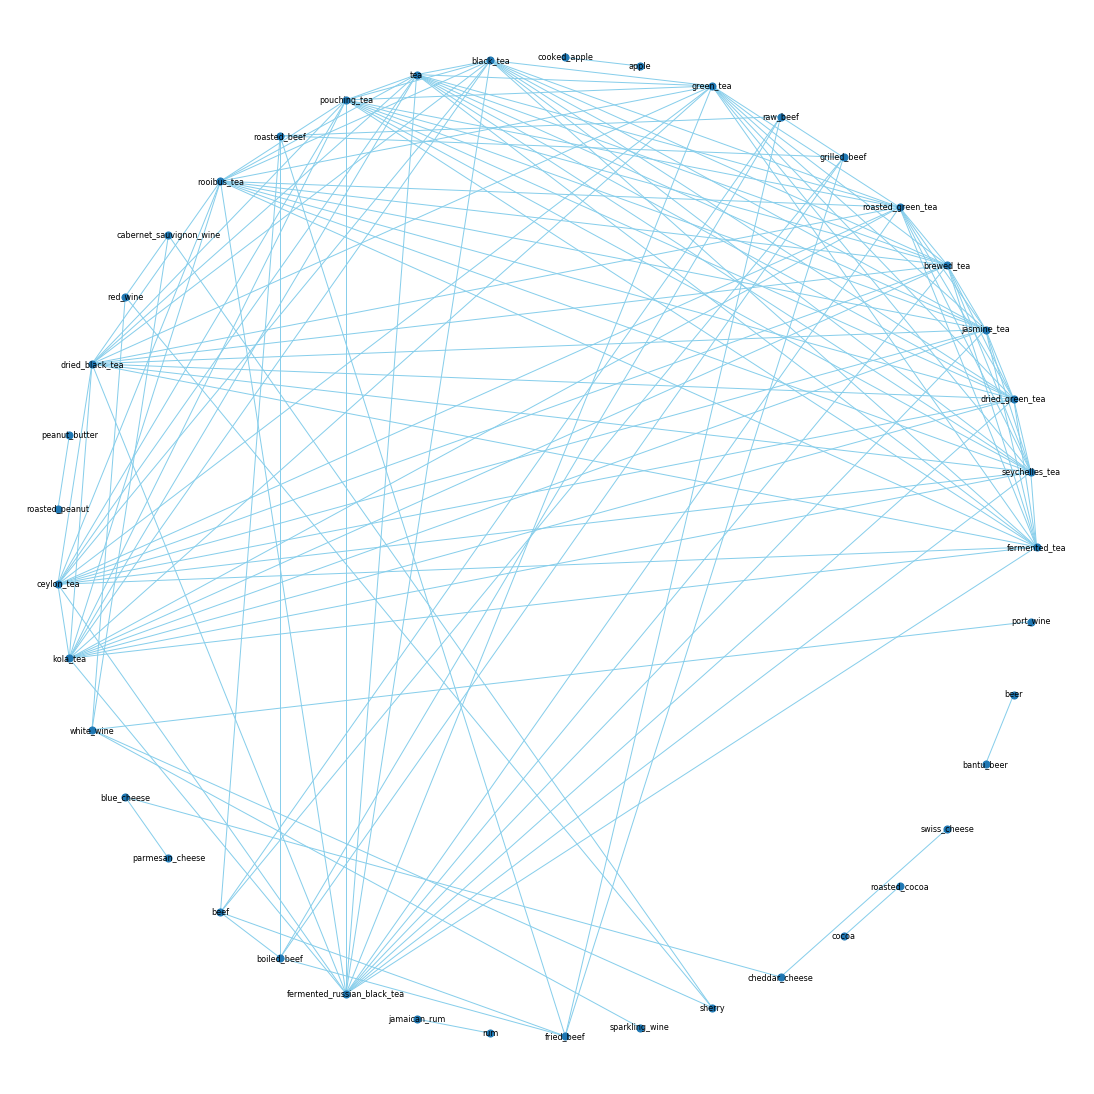

In [17]:
INGsub=ING[ING['SharedComp']>134]

import networkx as nx
G=nx.from_pandas_edgelist(INGsub, 'Ing1', 'Ing2', 'SharedComp')
pos = nx.circular_layout(G)

import matplotlib.pyplot as plt 

plt.rcParams["figure.figsize"] = (15,15) # set plot size

#weights = [math.log(edata['attr_dict'][200]) for f, t, edata in G0.edges(data=True)] # set weights

nx.draw(G, pos, with_labels=True,  node_size=50, 
        font_size=8,  edge_color="skyblue")

In [18]:
tea=ING[((ING['Ing1']=='black_tea') | (ING['Ing2']=='black_tea')) & (ING['SharedComp']>60)]
tea.head()

,Ing1,Ing2,SharedComp,test
1363,black_tea,muscat_grape,75,False
1878,black_tea,tilsit_cheese,66,False
4301,black_tea,raw_beef,94,False
4982,black_tea,cognac,83,False
7021,black_tea,brewed_tea,171,False


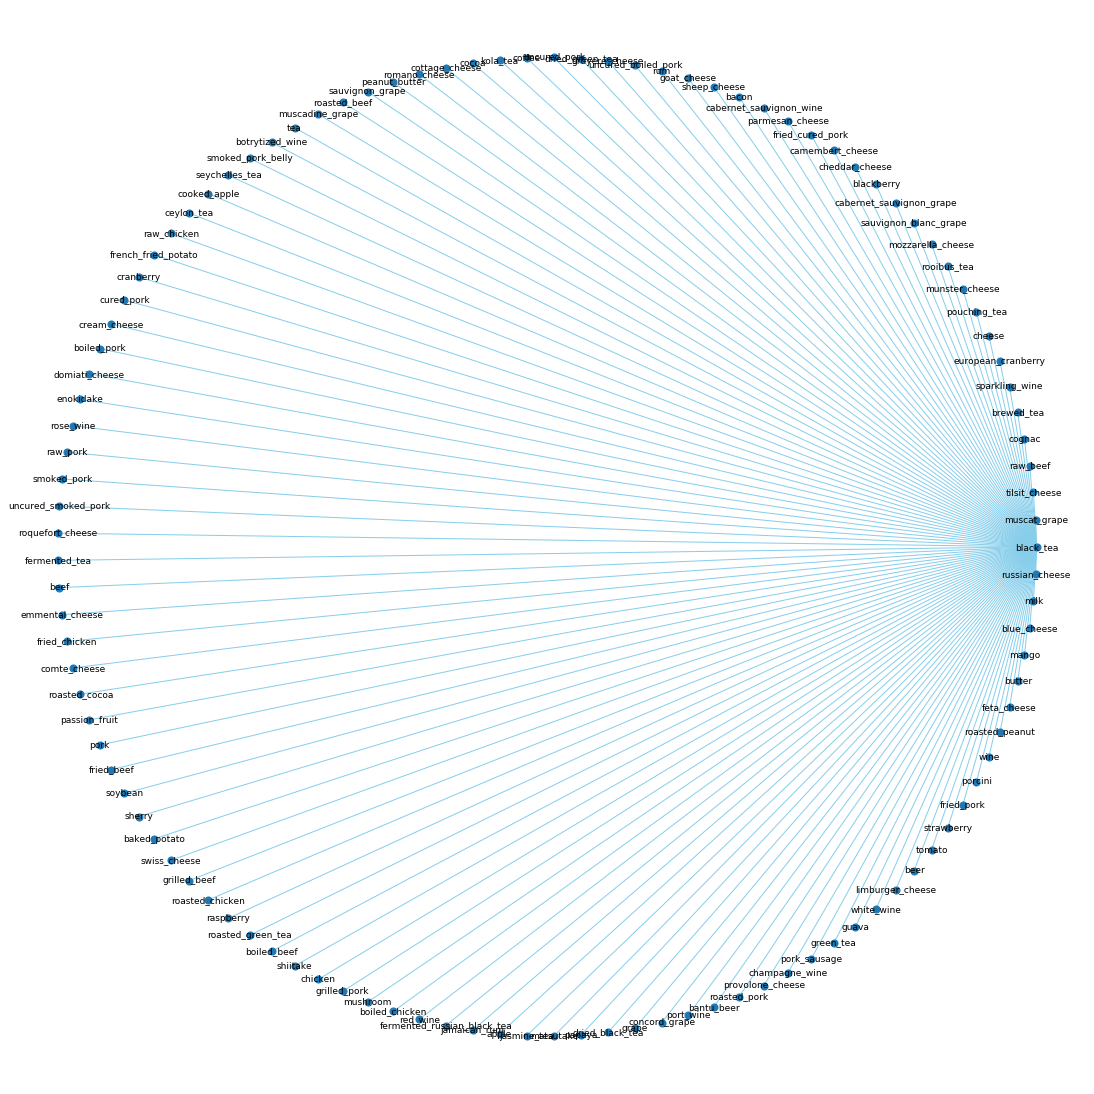

In [19]:
G=nx.from_pandas_edgelist(tea, 'Ing1', 'Ing2', 'SharedComp')
pos = nx.circular_layout(G)

plt.rcParams["figure.figsize"] = (15,15) # set plot size

#weights = [math.log(edata['attr_dict'][200]) for f, t, edata in G0.edges(data=True)] # set weights

nx.draw(G, pos, with_labels=True,  node_size=50, 
        font_size=9,  edge_color="skyblue")

To my surprise, black tea shares so many different compounds with so many diverse types of food, such as whiskey or mashed potato. None of them taste as tea to me:)

In [20]:
ING['sclog']=np.log(ING['SharedComp'])
ING.head()

,Ing1,Ing2,SharedComp,test,sclog
0,black_sesame_seed,rose_wine,3,False,1.10
1,fennel,wild_berry,5,False,1.61
2,comte_cheese,grape,57,False,4.04
3,nira,raw_beef,1,False,0.00
4,corn_mint_oil,parsnip_fruit,2,False,0.69


<Figure size 1600x480 with 0 Axes>

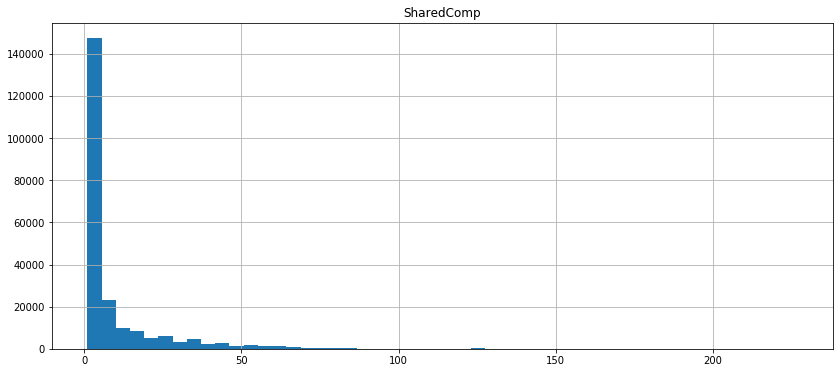

In [21]:
plt.rcParams["figure.figsize"] = (14,6) # set plot size
def myhist(df,mycolumns):
    
    from matplotlib.pyplot import figure
    figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')

    for i in mycolumns: 
        df.hist(column=i, bins=50) 
        
myhist(ING,['SharedComp'])

As we already have seen most ingredients do not share flavour compounds.

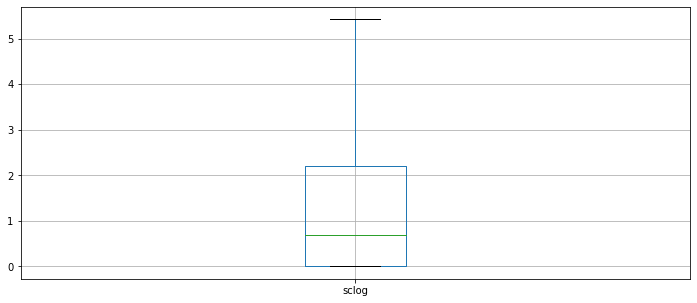

In [22]:
plt.rcParams["figure.figsize"] = (12,5) # set plot size
ING.boxplot(column='sclog')

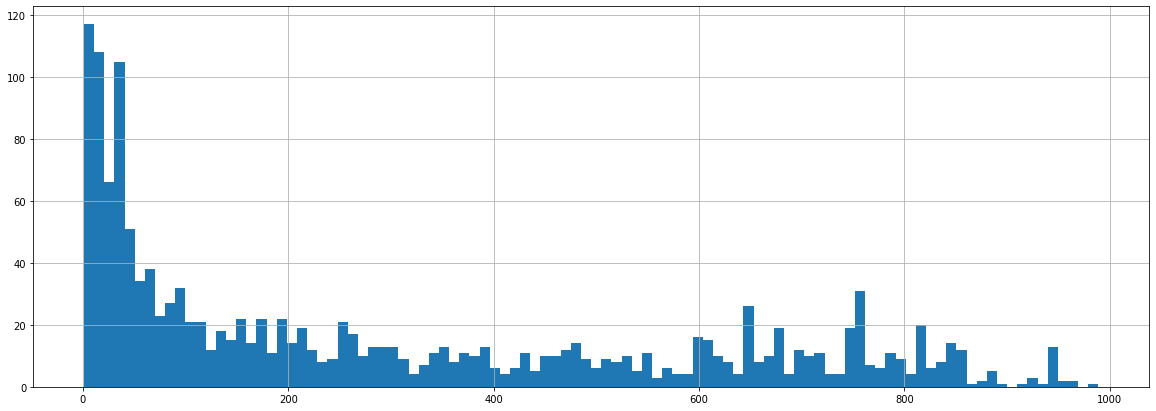

In [23]:
plt.rcParams["figure.figsize"] = (20,7) 
temp.hist(bins=100)

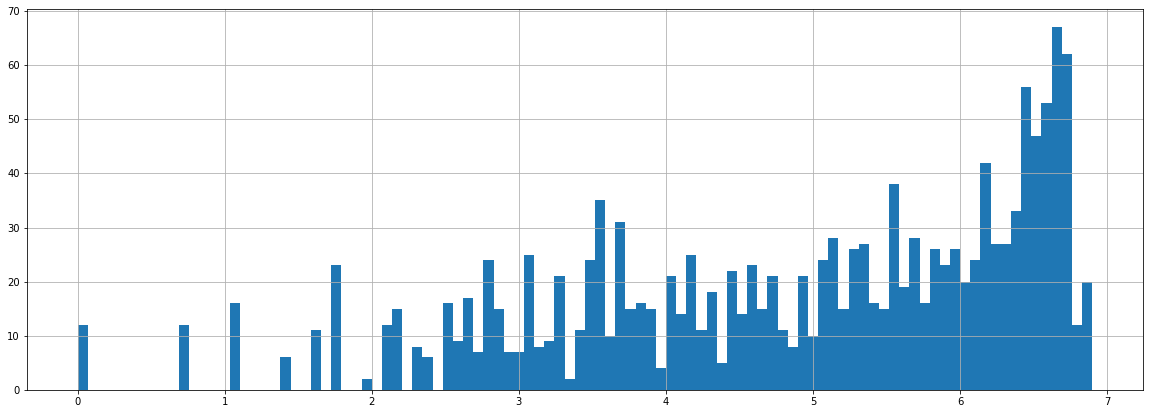

In [24]:
temp1=np.log(temp)

temp1.hist(bins=100)

We have some ingredients to appear only once or twice in the dataset, but most appear much more often.

#### 3.2 Recipes Data

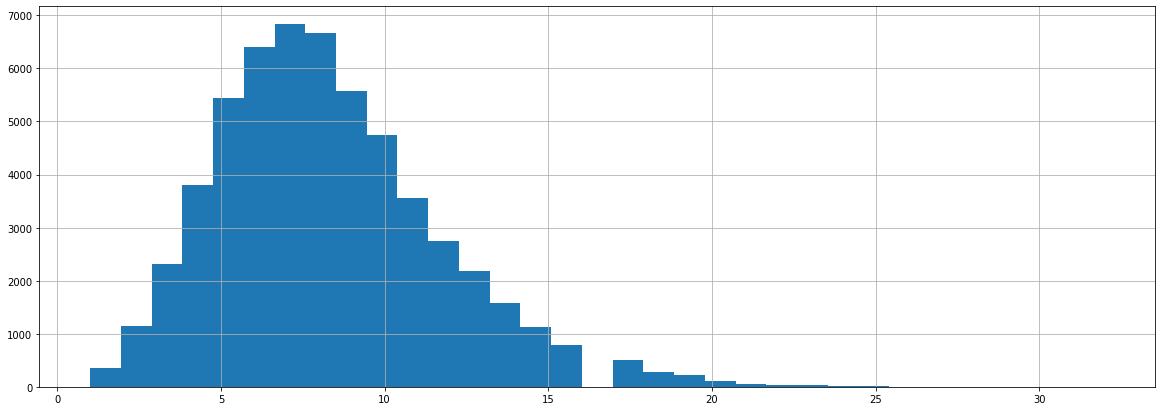

In [25]:
temp=32-COU.isnull().sum(axis=1)

temp.hist(bins=33)

Number of ingredients in recipies is right skewed. But generally we have very few recipies with more than 15 ingredients.

In [26]:
tempdf=temp.to_frame()

tempdf.head()

,0
0,32
1,32
2,5
3,16
4,9


In [27]:
COU1=COU['Cuisine']

temp1=tempdf.join(COU, how='outer')

temp1.groupby('Cuisine').count()

,0,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,I23,I24,I25,I26,I27,I28,I29,I30,I31,I32
Cuisine,,,,,,,,,,,,,,,,,,,,,
African,352,352,351,346,340,331,311,287,263,229,...,4,1,1,0,0,0,0,0,0,0
EastAsian,2512,2512,2484,2437,2339,2202,2036,1845,1577,1298,...,2,2,1,0,0,0,0,0,0,0
EasternEuropean,381,381,380,372,363,339,316,263,213,162,...,2,2,2,2,2,2,1,1,1,1
LatinAmerican,2917,2917,2910,2863,2773,2673,2482,2249,1993,1691,...,4,3,1,0,0,0,0,0,0,0
MiddleEastern,645,645,641,632,602,555,503,445,373,284,...,1,1,0,0,0,0,0,0,0,0
NorthAmerican,41524,41524,41263,40385,38573,35598,31293,26278,20969,15934,...,42,24,13,10,6,5,4,1,0,0
NorthernEuropean,250,250,249,245,223,185,147,112,85,65,...,0,0,0,0,0,0,0,0,0,0
SouthAsian,621,621,614,605,584,556,522,472,435,380,...,4,1,0,0,0,0,0,0,0,0
SoutheastAsian,457,457,454,451,444,428,413,382,356,327,...,4,2,0,0,0,0,0,0,0,0


NorthAmerican recipies represent disproportional number of recipies 41,524 out of 56,498; NorthernEuropean are the most underrepresented - only 250.

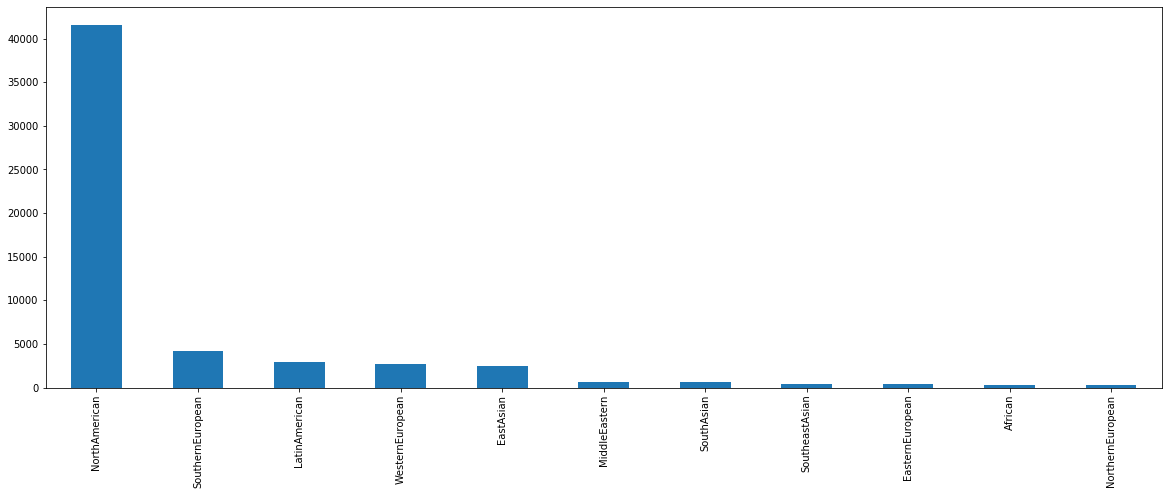

In [28]:
temp1['Cuisine'].value_counts().plot(kind='bar')

In [29]:
COU2=pd.melt(COU, id_vars=['Cuisine'], value_vars=['I1', 'I2','I3','I4','I5','I6','I7','I8','I9','I10','I11','I12','I13','I14',
                                                  'I15','I16','I17','I18','I19','I20','I21','I22','I23','I24','I25','I26',
                                                  'I27','I28','I29','I30','I31','I32'])

COU2.head()

,Cuisine,variable,value
0,EasternEuropean,I1,apple
1,SouthernEuropean,I1,olive_oil
2,African,I1,chicken
3,African,I1,cane_molasses
4,African,I1,butter


In [30]:
COU2=COU2.rename(columns={"value": "Ing"})

COU2.head()

,Cuisine,variable,Ing
0,EasternEuropean,I1,apple
1,SouthernEuropean,I1,olive_oil
2,African,I1,chicken
3,African,I1,cane_molasses
4,African,I1,butter


In [31]:
temp = COU2.Ing.value_counts()
temp.head()

egg       20951
wheat     20782
butter    20744
onion     18031
garlic    16893
Name: Ing, dtype: int64

In [32]:
temp.tail()

lilac_flower_oil    1
roasted_hazelnut    1
geranium            1
mate                1
jasmine_tea         1
Name: Ing, dtype: int64

We have 381 unique ingredients. Accross all recipies, egg is the most popular ingredient, wheat is second, and butter is third. Durain, beech, strawberry jam are all precent in just one recipe. 

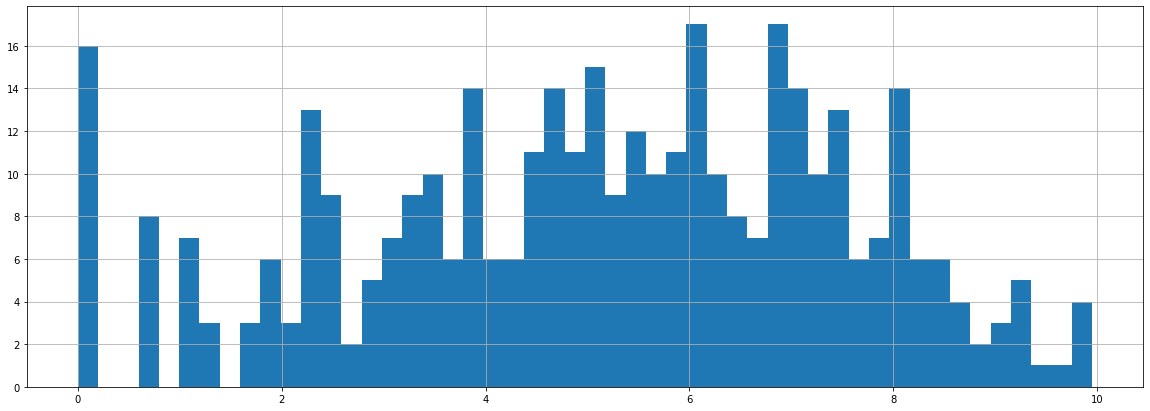

In [33]:
np.log(temp).hist(bins=50)

If we take log of ingredient occurences we get some combination of normal and uniform.

In [34]:
temp1=COU2.groupby(['Cuisine','Ing']).count()

temp1.reset_index().head()

,Cuisine,Ing,variable
0,African,almond,44
1,African,anise,2
2,African,anise_seed,1
3,African,apple,6
4,African,apricot,23


In [35]:
temp1.groupby('Cuisine').count()

,variable
Cuisine,
African,197
EastAsian,242
EasternEuropean,198
LatinAmerican,260
MiddleEastern,227
NorthAmerican,354
NorthernEuropean,175
SouthAsian,205
SoutheastAsian,184


Our recipies, for Northern America, have 354 different ingredients, while for Northern European, they have only 175 unique ingredients.

In [36]:
pairs = pd.DataFrame({'Cuisine' : [], 'Ing1': [], 'Ing2' : []})
for i in range(1,32):
    for j in range((i+1),33):
        temp=COU.iloc[:,[0,i,j]]
        temp.columns=['Cuisine','Ing1','Ing2']
        temp=temp.dropna()
        pairs=pairs.append(temp,ignore_index=True)
        
   

In [37]:
pairs1=pairs.dropna()

pairs1.head()

,Cuisine,Ing1,Ing2
0,EasternEuropean,apple,veal
1,SouthernEuropean,olive_oil,pork
2,African,chicken,cinnamon
3,African,cane_molasses,ginger
4,African,butter,pepper


In [38]:
pairs2=pairs1.reset_index()

pairs3=pairs2.groupby(['Cuisine','Ing1','Ing2'], as_index=False).count()

pairs3.head()

,Cuisine,Ing1,Ing2,index
0,African,almond,anise_seed,1
1,African,almond,apricot,2
2,African,almond,barley,2
3,African,almond,bay,2
4,African,almond,bean,1


In [39]:
pairs3.shape

(123181, 4)

In [40]:
pairs3.sort_values(by='index', ascending=False).head(10)

,Cuisine,Ing1,Ing2,index
74966,NorthAmerican,wheat,egg,10931
43137,NorthAmerican,butter,wheat,10562
42925,NorthAmerican,butter,egg,9294
75032,NorthAmerican,wheat,milk,7315
42995,NorthAmerican,butter,milk,6445
51239,NorthAmerican,egg,milk,6405
73538,NorthAmerican,vanilla,egg,5677
75160,NorthAmerican,wheat,vanilla,5645
43127,NorthAmerican,butter,vanilla,5528
73987,NorthAmerican,vegetable_oil,egg,4839


Out of all pairs "wheat"-"egg" came the first.

<Figure size 1600x480 with 0 Axes>

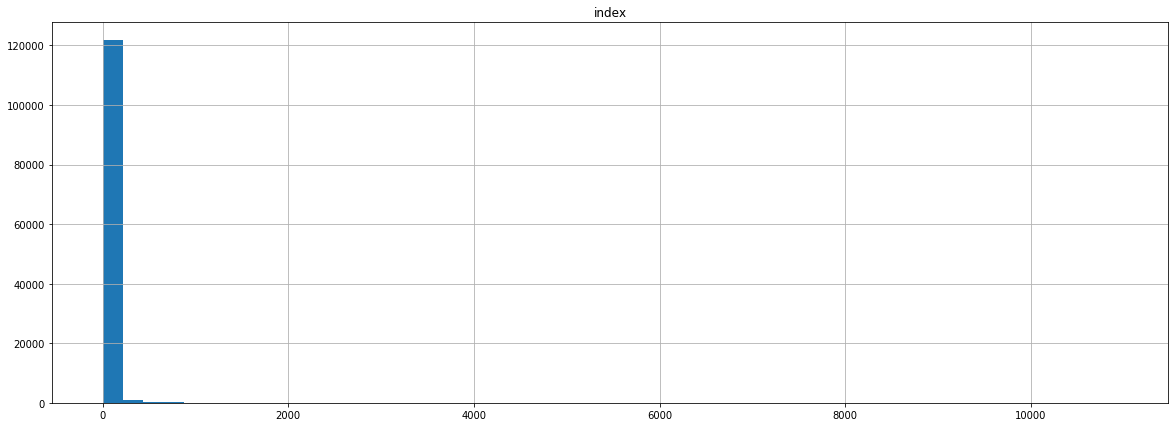

In [41]:
myhist(pairs3,['index'])

Interestingly that most pairs do not have such a high frequency.

<Figure size 1600x480 with 0 Axes>

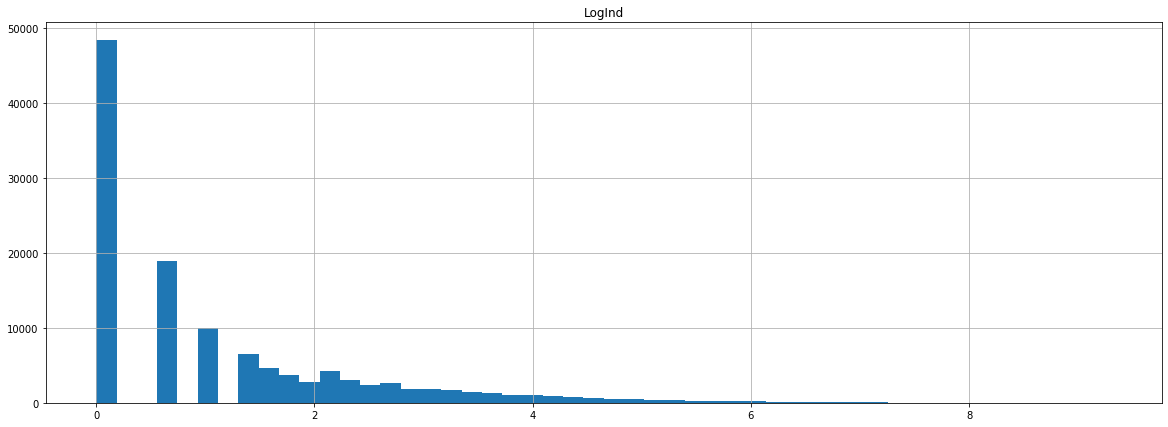

In [42]:
pairs3['LogInd']=np.log(pairs3['index'])

myhist(pairs3,['LogInd'])

In [43]:
pairs4=pairs3[(pairs3['index']>600) & (pairs3['Cuisine']=='NorthAmerican')]
pairs4.shape

(389, 5)

In [44]:
G=nx.from_pandas_edgelist(pairs4, 'Ing1', 'Ing2', 'index')
pos = nx.circular_layout(G)

C:\Users\m_gro\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


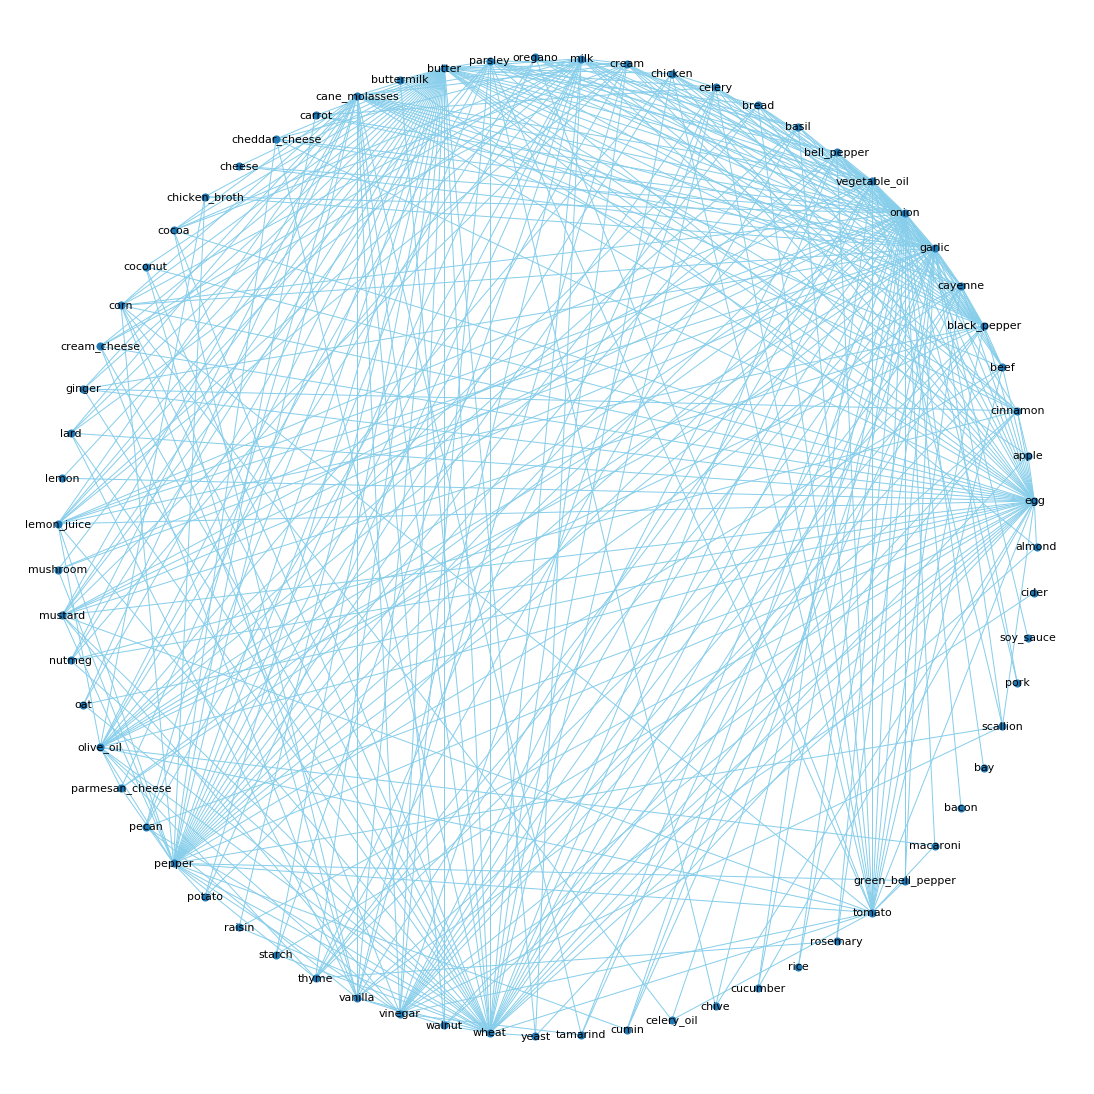

In [45]:
plt.rcParams["figure.figsize"] = (15,15) # set plot size

#weights = [math.log(edata['attr_dict'][200]) for f, t, edata in G0.edges(data=True)] # set weights

nx.draw(G, pos, with_labels=True,  node_size=50, 
        font_size=11,  edge_color="skyblue")

Above is a graph of the most common ingredients of North American cuisine and their intercations.

### 4. Analysis


#### 4.1 Number of Ingredients by Cuisine.

In [46]:
temp=32-COU.isnull().sum(axis=1)
tempdf=temp.to_frame()
temp1=tempdf.join(COU, how='outer')

In [47]:
temp1.groupby('Cuisine').mean()

,0
Cuisine,
African,10.45
EastAsian,8.96
EasternEuropean,8.39
LatinAmerican,9.38
MiddleEastern,8.39
NorthAmerican,7.96
NorthernEuropean,6.82
SouthAsian,10.29
SoutheastAsian,11.32


SoutheastAsian recipies have the most ingredients, while NorthernEuropean ones have the fewest.

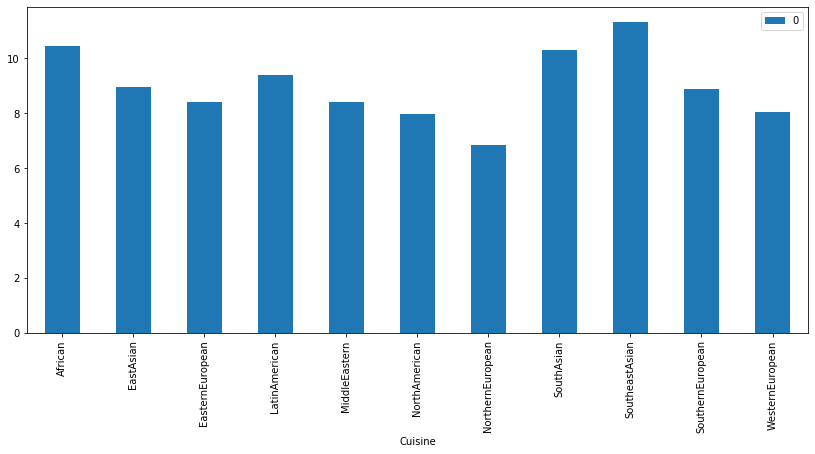

In [48]:
plt.rcParams["figure.figsize"] = (14,6) # set plot size
temp1.groupby('Cuisine').mean().reset_index().plot.bar(x='Cuisine')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002332F40AF28>,
      dtype=object)

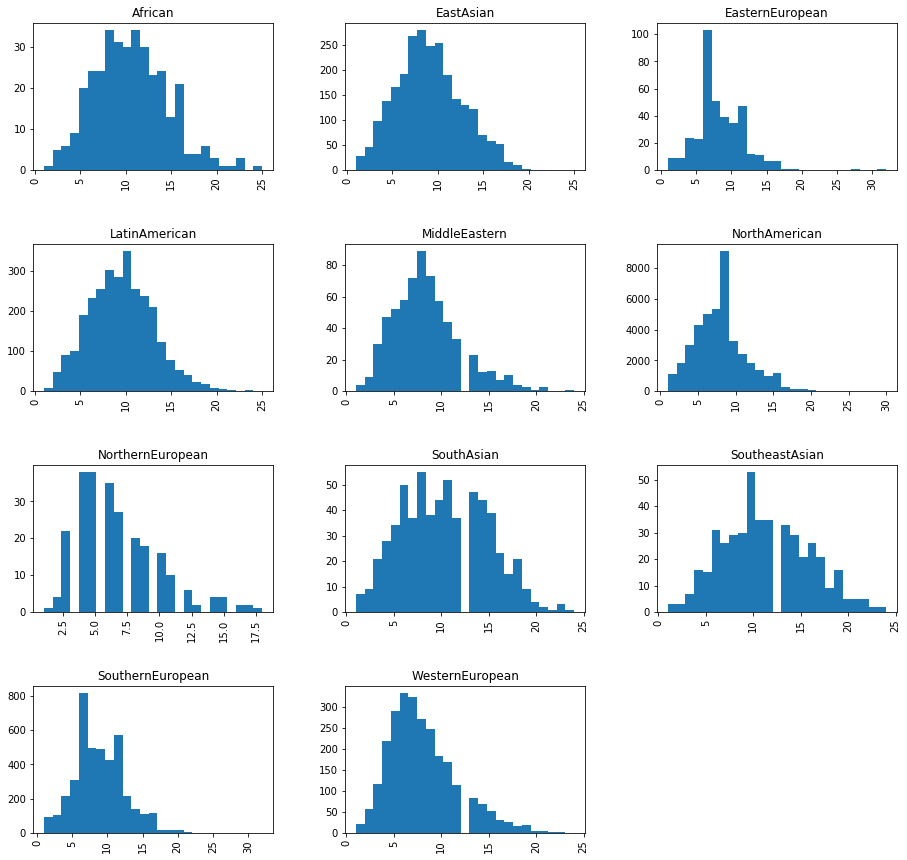

In [49]:
temp2=temp1.reset_index()


plt.rcParams["figure.figsize"] = (15,15) # set plot size
temp1[0].hist(by=temp1['Cuisine'],bins=25)

Histograms of number of ingredients by cuisine

#### 4.2 Venn Diagram


In [50]:
import matplotlib_venn as venn

from matplotlib_venn import venn3

In [51]:
VD=COU2[['Cuisine','Ing']]
VD1=VD.dropna()
afr=VD1[VD1['Cuisine']=='African']
ea=VD1[VD1['Cuisine']=='EastAsian']
ee=VD1[VD1['Cuisine']=='EasternEuropean']
la=VD1[VD1['Cuisine']=='LatinAmerican']
me=VD1[VD1['Cuisine']=='MiddleEastern']
na=VD1[VD1['Cuisine']=='NorthAmerican']
ne=VD1[VD1['Cuisine']=='NorthernEuropean']
sa=VD1[VD1['Cuisine']=='SouthAsian']
sea=VD1[VD1['Cuisine']=='SoutheastAsian']
se=VD1[VD1['Cuisine']=='SouthernEuropean']
we=VD1[VD1['Cuisine']=='WesternEuropean']

In [52]:
set1 = set(afr['Ing'])
set2 = set(ea['Ing'])
set3 = set(ee['Ing'])
set4 = set(la['Ing'])
set5 = set(me['Ing'])
set6 = set(na['Ing'])
set7 = set(ne['Ing'])
set8 = set(sa['Ing'])
set9 = set(sea['Ing'])
set10 = set(se['Ing'])
set11 = set(we['Ing'])

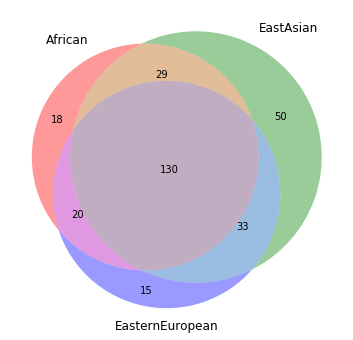

In [53]:
plt.rcParams["figure.figsize"] = (11,6) # set plot size
venn3([set1, set2, set3], ('African', 'EastAsian', 'EasternEuropean'))

Interesting, African cuisine has 18 unique ingredients, while East Asian has 50!, and Eastern European has only 15.

18 unique African ingredients:

In [54]:
set1.difference(set2).difference(set3)

{'artichoke',
 'cassava',
 'chervil',
 'condiment',
 'flower',
 'goat_cheese',
 'lemongrass',
 'orange_flower',
 'papaya',
 'passion_fruit',
 'peach',
 'peppermint_oil',
 'pimento',
 'prawn',
 'quince',
 'rose',
 'sunflower_oil',
 'yam'}

Analysis of 18 ingredients leads us to conclude that data is very incomplete. Peach is used in East Asian cuisine for instance and sunflower oil is extremly popular in Eastern Europe. So it is not clear why these ingredients were not include in the dataset.

50 unique East Asian ingredients:

In [56]:
set2.difference(set1).difference(set3)

{'artemisia',
 'beech',
 'beef_liver',
 'bitter_orange',
 'black_sesame_seed',
 'chicory',
 'chinese_cabbage',
 'citrus_peel',
 'cognac',
 'corn_flake',
 'crab',
 'eel',
 'endive',
 'enokidake',
 'frankfurter',
 'gardenia',
 'gin',
 'grape',
 'grapefruit',
 'green_tea',
 'japanese_plum',
 'kale',
 'katsuobushi',
 'kelp',
 'kiwi',
 'licorice',
 'litchi',
 'mackerel',
 'malt',
 'mandarin',
 'mandarin_peel',
 'maple_syrup',
 'matsutake',
 'melon',
 'mung_bean',
 'nira',
 'oatmeal',
 'oyster',
 'palm',
 'raw_beef',
 'red_algae',
 'red_bean',
 'sake',
 'sea_algae',
 'seaweed',
 'sesame_oil',
 'shellfish',
 'tangerine',
 'wasabi',
 'watermelon'}

As coming from Eastern Europe, I can pinpoint that beef liver, grape, melon, oatmeal, and watermelon are all common ingredients in Eastern Europe, so the reasons for exclusion is not clear.

15 unique Eastern Europen ingredients:

In [57]:
set3.difference(set1).difference(set2)

{'black_currant',
 'blackberry',
 'buttermilk',
 'cherry_brandy',
 'chicken_liver',
 'corn_grit',
 'cured_pork',
 'lovage',
 'porcini',
 'rye_bread',
 'smoked_sausage',
 'swiss_cheese',
 'tomato_juice',
 'violet',
 'whiskey'}

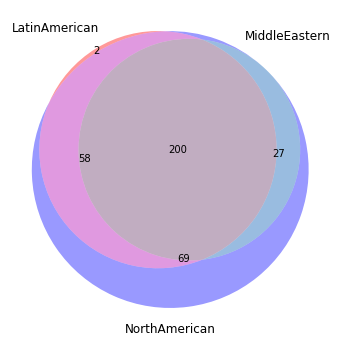

In [58]:
venn3([set4, set5, set6], ('LatinAmerican', 'MiddleEastern', 'NorthAmerican'))

North American cuisine has 69 unique ingredients, that are not part of either Latin American or Middle Eastern cuisine. All 3 cuisines share 200 common ingredients.

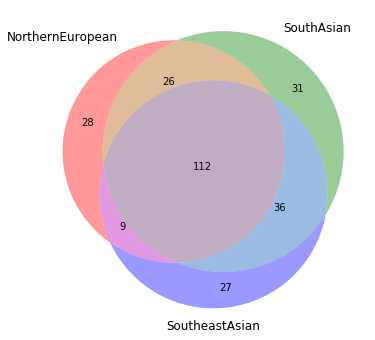

In [59]:
venn3([set7, set8, set9], ('NorthernEuropean', 'SouthAsian', 'SoutheastAsian'))

These 3 cuisines have a lot unique ingredients. Northern European has 28 ingredients it does not share with other 2. While Southeast Asian has 27 unique ingredients and South Asian 31.

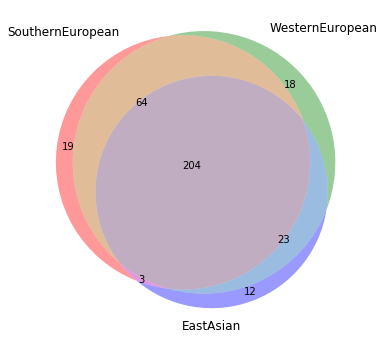

In [60]:
venn3([set10, set11, set2], ('SouthernEuropean', 'WesternEuropean', 'EastAsian'))

Surprisingly, these 3 cuisines have huge overlap with each other, even though East Asian does not use ~ 100 ingredients that European cousins do. 

#### 4.3 Unique Ingredients by Cuisine.

African cuisne does not have any ingredients that are not part of 10 other cuisines. 

East Asian has 6 unique ingredients. I am not clear what raw beef means. If it is not cooked then French eat raw beef as well. 

In [61]:
set2.difference(set1).difference(set3).difference(set4).difference(set5).difference(set6).difference(set7).difference(set8).difference(set9).difference(set10).difference(set11)

{'beech', 'eel', 'kelp', 'raw_beef', 'red_algae', 'sea_algae'}

Eastern European, Latin American, Middle Eastern cuisines do not have unique ingredients.

North America has 20 unique ingredients. Again, I do not agree with data. Jasmine tea is much more popular in East Asia, than in North America. The same applies to mate, more popular in South America. Again, roasted hazelnut consumed in Europe and Middle East. And carob is consumed widely in Middle East. And as a last straw, sturgeon caviar made to North American list, but not to Eastern European! So on, and so on.

In [62]:
set6.difference(set1).difference(set2).difference(set3).difference(set4).difference(set5).difference(set7).difference(set8).difference(set9).difference(set10).difference(set11)

{'angelica',
 'balm',
 'black_raspberry',
 'carnation',
 'carob',
 'concord_grape',
 'geranium',
 'jasmine_tea',
 'laurel',
 'lilac_flower_oil',
 'mate',
 'muscat_grape',
 'pelargonium',
 'roasted_hazelnut',
 'roasted_nut',
 'roasted_pecan',
 'sassafras',
 'smoked_fish',
 'soybean_oil',
 'sturgeon_caviar'}

Southeast Asian unique ingredients are:

In [63]:
set9.difference(set1).difference(set2).difference(set3).difference(set4).difference(set5).difference(set6).difference(set7).difference(set8).difference(set10).difference(set11)

{'durian', 'holy_basil'}

Southern European unique ingredients are:

In [64]:
set10.difference(set1).difference(set2).difference(set3).difference(set4).difference(set5).difference(set6).difference(set7).difference(set8).difference(set9).difference(set11)

{'grape_brandy', 'pimenta', 'rapeseed'}

Western European unique ingredients are (I am not sure that Jamacain people will agree that Jamaican Rum is uniqely Western European):

In [65]:
set11.difference(set1).difference(set2).difference(set3).difference(set4).difference(set5).difference(set6).difference(set7).difference(set8).difference(set9).difference(set10)

{'emmental_cheese', 'jamaican_rum', 'strawberry_jam', 'strawberry_juice'}

#### 4.4 Most Common Ingredients by Cuisine.

In [66]:
pd.set_option('display.max_rows', 400)
temp1=COU2.groupby(['Cuisine','Ing']).count()
temp1.sort_values(['Cuisine','variable'],ascending = False).groupby('Cuisine').head(10)

variable
Cuisine          Ing                    
WesternEuropean  butter             1395
                 egg                1303
                 wheat              1278
                 onion               720
                 milk                693
                 cream               640
                 black_pepper        548
                 garlic              510
                 olive_oil           455
                 vegetable_oil       392
SouthernEuropean olive_oil          2612
                 garlic             2181
                 tomato             1593
                 onion              1451
                 egg                1097
                 basil              1059
                 black_pepper       1039
                 wheat              1027
                 parsley            1025
                 butter             1020
SoutheastAsian   garlic              284
                 fish                226
                 cayenne             191
                 vegetable_oil       180
                 cilantro            163
                 rice                163
                 ginger              153
                 soy_sauce           144
                 chicken             136
                 lime_juice          132
SouthAsian       cumin               375
                 turmeric            319
                 onion               316
                 cayenne             300
                 garlic              295
                 coriander           294
                 vegetable_oil       265
                 ginger              264
                 pepper              188
                 cilantro            180
NorthernEuropean butter              160
                 wheat               145
                 egg                 132
                 cream                72
                 milk                 56
                 almond               46
                 onion                39
                 cinnamon             38
                 vanilla              38
                 vinegar              38
NorthAmerican    butter            17088
                 egg               16738
                 wheat             16532
                 onion             12311
                 milk              10996
                 garlic            10101
                 cream              8124
                 vanilla            8081
                 vegetable_oil      7808
                 pepper             7000
MiddleEastern    wheat               272
                 olive_oil           262
                 egg                 239
                 onion               221
                 garlic              212
                 butter              165
                 lemon_juice         160
                 black_pepper        145
                 parsley             134
                 vegetable_oil       132
LatinAmerican    cayenne            1946
                 onion              1906
                 garlic             1752
                 tomato             1579
                 corn                868
                 cumin               833
                 vegetable_oil       732
                 cilantro            724
                 wheat               660
                 pepper              640
EasternEuropean  butter              201
                 egg                 197
                 wheat               197
                 onion               162
                 cream               111
                 milk                 94
                 black_pepper         88
                 garlic               88
                 vegetable_oil        82
                 potato               73
EastAsian        soy_sauce          1358
                 garlic             1302
                 scallion           1188
                 cayenne            1008
                 sesame_oil          937
                 rice                849
              

Depending on cuisine, the most common ingredients are different. For instance, for Western European, the most common ingredients are butter, egg, and wheat, while for African are olive oil, onion, and cumin.

Some observations:

- Butter is the most common ingredient in Western Europe, Northern Europe, North America, and Eastern Europe. However, it does not make in top 3 in any other cuisines. In Southern Europe, it is # 10, in Middle East # 6.
- Olive oil is # 1 ingredient in Southern Europe and Africa, in Middle East it is the 2nd most common ingredient. In Western Europe it is # 9.
- Garlic - number 1 in Southeast Asian, number 2 in Southern Europe and East Asia, number 3 in Latin America. # 8 in Western Europe, # 5 in South Asia, # 6 in North America, # 5 in Middle East, # 8 in Eastern Europe, # 4 in Africa. I think we can say that garlic is loved all around the world, except for Northern Europe.
- Cumin - number 1 in South Asia, number 3 in Africa
- Wheat - number 1 in Middle East, number 2 in Northern Europe, number 3 in Western Europe, Eastern Europe, and North America
- Cayenne - number 1 in Latin America, number 3 in Southeast Asia
- Soy Sauce - number 1 in East Asia
- Fats - as we already mentioned, the most common fat in Western Europe, Northern Europe, North America, and Eastern Europe is butter. In Southern Europe, Africa, and Middle East, it is olive oil. In Southeast Asia, South Asia, and Latin America, it is generic vegetable oil. In East Asia, it is sesame oil.
- Most common protein - in Western Europe, Southern Europe, Northern Europe, North America, Middle East, Eastern Europe it is egg. In Southeast Asia, it is fish. In South Asia, it is yogurt. In Latin America, it is cheese. In East Asia, soybean. In Africa, it is chicken.
- Most common carbs - in Western Europe, Southern Europe, Northern Europe, North America, Middle East, Eastern Europe, and Africa it is wheat. In Southeast Asia, South Asia, and East Asia it is rice. In Latin America, it is corn.  
- Most common spice - in Western Europe, Northern Europe, North America, Middle East, Eastern Europe, and Africa - onion. In Southern Europe, Southeast Asia, and East Asia, garlic. In South Asia, cumin. In Latin America, cayenne.
- Most common vegetable - in Western Europe, Northern Europe, and Eastern Europe, potato. In Southern Europe, South Asia, North America, Middle East, and Latin America, tomato. In Southeast Asia and Africa, bell pepper. In East Asia, carrot.
- The most common meat - 


#### 4.5 Most Common Ingredient Pairs by Cuisine

In [69]:
pairs3.sort_values(['Cuisine','index'],ascending = False).groupby('Cuisine').head(6)

,Cuisine,Ing1,Ing2,index,LogInd
110061,WesternEuropean,butter,wheat,902,6.80
122653,WesternEuropean,wheat,egg,843,6.74
109895,WesternEuropean,butter,egg,813,6.70
122700,WesternEuropean,wheat,milk,500,6.21
113217,WesternEuropean,egg,milk,472,6.16
109949,WesternEuropean,butter,milk,453,6.12
101651,SouthernEuropean,olive_oil,garlic,1730,7.46
106338,SouthernEuropean,tomato,olive_oil,1069,6.97
106292,SouthernEuropean,tomato,garlic,1044,6.95
101706,SouthernEuropean,olive_oil,onion,1006,6.91


Observations:

- Butter and Wheat - in Western European and Northern European cuisines, mit is the most common combination. In North America and Eastern Europe, it is the second most common. Butter is also commonly cooked with egg. Wheat is also commonly cooked with egg as well.
- Olive Oil and Garlic - in Southern Europe, it is the most common combination. In Middle East and Africa, it is the second most common combination. Both olive oil and garlic often cooked with tomatoes. Olive oil is also common,y cooked with cummin and onions.
- Garlic and Vegetable Oil - similar to Olive Oil and Garlic above, in Southeast Asia, it is the most common combination.
- Cumin and Tumeric - these 2 spices is the most common combination in South Asia. Both of these spices are often cooked with coriander.
- Wheat and Egg - as already mentioned, this is a popular combination. Actually, it is # 1 combination in Northern America, Middle East, and Eastern Europe.
- Onion and Cayenne - spicy! The most common combination in Latin America. Onion is also commonly cooked with olive oil and tomato.
- Cayenne and Scalion - spicy again. The most common combination is East Asia.
- Olive Oil and Cumin - the most common combination in Africa.
- Fat + Carb Combo - we have seen very common combo, such as Butter and Wheat, to some extend Egg and Wheat, Milk and Wheat, Wheat and Cream can be included
- Fat + Spice - a lot of combinations, such as Olive Oil and Garlic, Olive Oil and Onion, Olive Oil and Basil, Olive Oil and Cumin, Vegetable Oil and Garlic, Olive Oil and Parsley, Sesame Oil and Soy Sauce, Sesame Oil and Scallion, Sesame Oil and Garlic
- Spice + Spice - extremly popular. Examples are Ginger and Garlic, Coriander and Cumin, Cumin and Tumeric (curry), Coriander and Tumeric, Onion and Cumin, Onion and Tumeric, Cayenne and Cumin, Onion and Cayenne, Onion and Garlic, Cayenne and Garlic, and many more

As we already started to see, different cuisines use different ingredients and different approaches to food combinations.